## Summary

The feature 'Click' is the target variable in this dataset. It can take 2 values 0 or 1, therefore, this is a binary classification problem. The independent features are related to time, site, app, device and other anonymized categorical features.

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

## Importing Data

In [2]:
train_data = pd.read_csv("sampled_training", header = None, 
                   names = ['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

test_data = pd.read_csv("sampled_test", header = None, 
                   names = ['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'])

## Understanding the Data
-  The __head()__ function displays the first 5 rows and the columns. This helps in ensuring that the data was imported correctly.
-  The __info()__ function shows that there are 843502 observations in the train dataset and 100000 observations in the test dataset. There are no missing values in both the datasets. The info() function also displays the datatype of the columns. Some of the columns have 'object' datatype.
-  The __describe()__ function generates descriptive statistics like count, mean, standard deviation.

In [3]:
train_data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,10002028568167339219,0,14102100,1005,0,9e8cf15d,0d3cb7be,f028772b,ecad2386,7801e8d9,...,1,2,20596,320,50,2161,0,35,100148,157
1,10006958186789044052,1,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,0acbeaa3,45a51db4,...,1,0,18993,320,50,2161,0,35,100034,157
2,10011650513707909570,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,febd1138,82e27996,...,1,0,21611,320,50,2480,3,297,100111,61
3,10022961149355219548,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,e2fcccd2,5c5a694b,...,1,0,4687,320,50,423,2,39,100148,32
4,10029289556764215760,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,100084,79


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843502 entries, 0 to 843501
Data columns (total 24 columns):
id                  843502 non-null uint64
click               843502 non-null int64
hour                843502 non-null int64
C1                  843502 non-null int64
banner_pos          843502 non-null int64
site_id             843502 non-null object
site_domain         843502 non-null object
site_category       843502 non-null object
app_id              843502 non-null object
app_domain          843502 non-null object
app_category        843502 non-null object
device_id           843502 non-null object
device_ip           843502 non-null object
device_model        843502 non-null object
device_type         843502 non-null int64
device_conn_type    843502 non-null int64
C14                 843502 non-null int64
C15                 843502 non-null int64
C16                 843502 non-null int64
C17                 843502 non-null int64
C18                 843502 non-null int

In [5]:
train_data.describe()

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,8.435020e+05,843502.000000,8.435020e+05,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000,843502.000000
mean,9.231625e+18,0.170271,1.410250e+07,1004.959553,0.293501,1.016934,0.330417,18560.262501,318.861537,60.286297,2077.663483,1.443956,217.741979,54155.776171,79.551913
std,5.325619e+18,0.375871,2.684486e+02,1.132949,0.515961,0.553377,0.854515,5007.778987,21.730624,47.965820,610.749820,1.323114,342.722108,49887.241496,66.999613
min,1.308118e+13,0.000000,1.410210e+07,1001.000000,0.000000,0.000000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000
25%,4.622961e+18,0.000000,1.410222e+07,1005.000000,0.000000,1.000000,0.000000,16688.000000,320.000000,50.000000,1800.000000,0.000000,35.000000,-1.000000,23.000000
50%,9.238306e+18,0.000000,1.410251e+07,1005.000000,0.000000,1.000000,0.000000,20108.000000,320.000000,50.000000,2295.000000,2.000000,39.000000,100057.000000,52.000000
75%,1.384568e+19,0.000000,1.410272e+07,1005.000000,1.000000,1.000000,0.000000,21768.000000,320.000000,50.000000,2506.000000,3.000000,167.000000,100084.000000,91.000000
max,1.844669e+19,1.000000,1.410300e+07,1012.000000,7.000000,5.000000,5.000000,23836.000000,1024.000000,1024.000000,2729.000000,3.000000,1839.000000,100248.000000,253.000000


In [6]:
train_data.describe(include=['O']) #The describe() function above gives information about the numeric datatypes only. The include parameter can be used to get information about object datatypes.

,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model
count,843502,843502,843502,843502,843502,843502,843502,843502,843502
unique,2366,2506,21,2211,156,28,78975,153806,4415
top,85f751fd,c4e18dd6,50e219e0,ecad2386,7801e8d9,07d7df22,a99f214a,699f69bd,8a4875bd
freq,294815,306511,339610,548687,580117,556049,688380,13341,50208


In [7]:
test_data.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,635176803480460379,14103000,1002,0,85f751fd,c4e18dd6,50e219e0,27550a3c,7801e8d9,07d7df22,...,0,0,23553,300,50,2699,0,163,-1,212
1,6360170755674123511,14103000,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,17614,320,50,1993,2,1063,-1,33
2,6372531204453459606,14103000,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23726,320,50,2717,2,47,-1,23
3,6375797800199782003,14103000,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
4,638604204480092601,14103000,1005,0,7294ea0f,863fa89d,3e814130,ecad2386,7801e8d9,07d7df22,...,1,0,17239,320,50,1973,3,39,-1,23


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
id                  100000 non-null uint64
hour                100000 non-null int64
C1                  100000 non-null int64
banner_pos          100000 non-null int64
site_id             100000 non-null object
site_domain         100000 non-null object
site_category       100000 non-null object
app_id              100000 non-null object
app_domain          100000 non-null object
app_category        100000 non-null object
device_id           100000 non-null object
device_ip           100000 non-null object
device_model        100000 non-null object
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 100000 non-null int64
C19                 100000 non-null int6

## Exploratory Data Analysis
Analyzing the target variable shows that the dataset has 82.97% of no clicks and 17.03% clicks. This shows that the dataset is unbalanced.

In [9]:
train_data['click'].value_counts(normalize=True)

0    0.829729
1    0.170271
Name: click, dtype: float64

## Features
The dataset has mostly categorical features. Analyzing the number of observations in the different categories of the features helps in understanding the distribution of the data. Since this is a click dataset, it is important to analyze the click through rate (CTR) as well. Click through rate = number of clicks/number of impressions. The mean across different categories gives the CTR.

### Feature C1
The category 1005 has the max number of observations. However, the category 1002 has the highest click through rate of 0.21. Category 1005 also has a high CTR of 0.17.

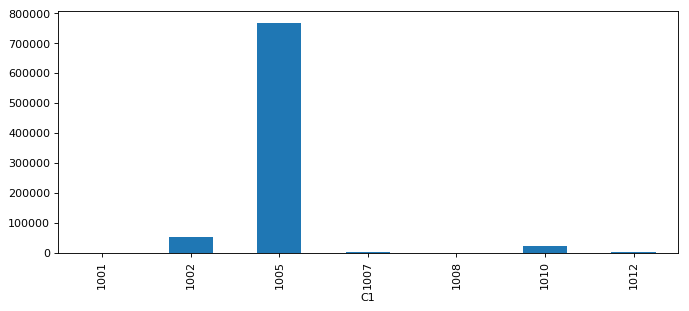

In [10]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['C1'])['click'].agg('count').plot.bar()
plt.show()

In [11]:
train_data[["click","C1"]].groupby("C1").mean().sort_values('click',ascending=False) #Calculating CTR and sorting in the descending order.

,click
C1,
1002,0.212606
1005,0.170058
1008,0.164634
1010,0.091045
1012,0.068479
1007,0.044578
1001,0.018315


### Feature banner_pos
The category 0 has the max number of observations. However, the category 7 has the highest click through rate of 0.30. Category 0 has a CTR of 0.16. This shows that most of the observations in category 0 are not clicked.

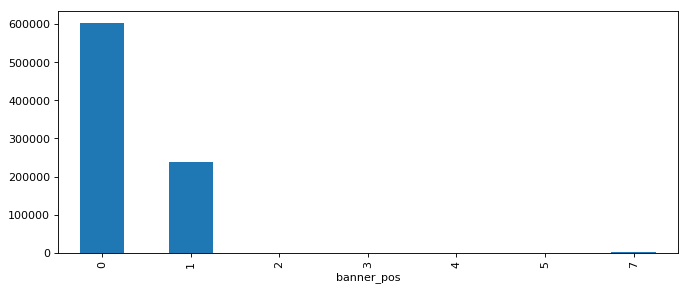

In [12]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['banner_pos'])['click'].agg('count').plot.bar()
plt.show()

In [13]:
train_data[["click","banner_pos"]].groupby("banner_pos").mean().sort_values('click',ascending=False)

,click
banner_pos,
7,0.298739
1,0.186881
5,0.164634
0,0.163545
4,0.150838
3,0.118644
2,0.103203


### Feature Device Type
The category 1 has the max number of observations. However, the category 0 has the highest click through rate of 0.21. Category 1 has the second highest CTR value of 0.17.

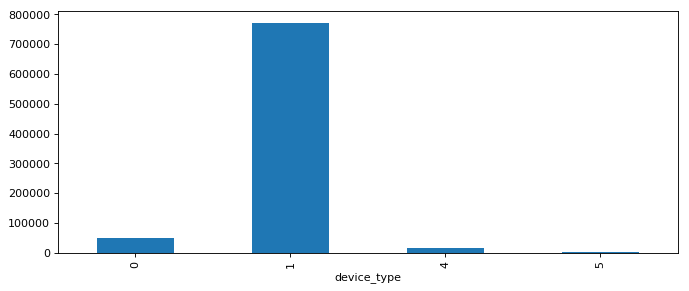

In [14]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['device_type'])['click'].agg('count').plot.bar()
plt.show()

In [15]:
train_data[["click","device_type"]].groupby("device_type").mean().sort_values('click',ascending=False)

,click
device_type,
0,0.212606
1,0.169607
4,0.092953
5,0.079595


### Feature Device Conn Type
The category 0 has the max number of observations and the highest click through rate.

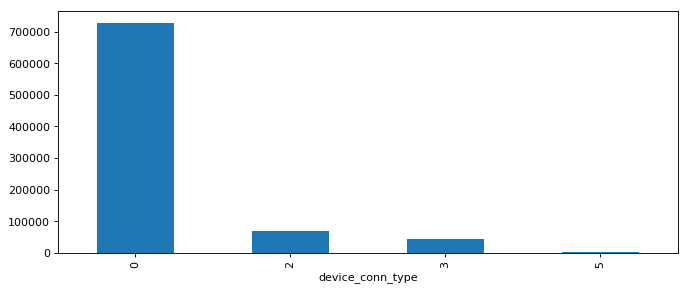

In [16]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['device_conn_type'])['click'].agg('count').plot.bar()
plt.show()

In [17]:
train_data[["click","device_conn_type"]].groupby("device_conn_type").mean().sort_values('click',ascending=False)

,click
device_conn_type,
0,0.181809
2,0.134257
3,0.042110
5,0.032412


### Feature C15
The category 320 has the max number of observations. However, the category 300 has the highest click through rate.

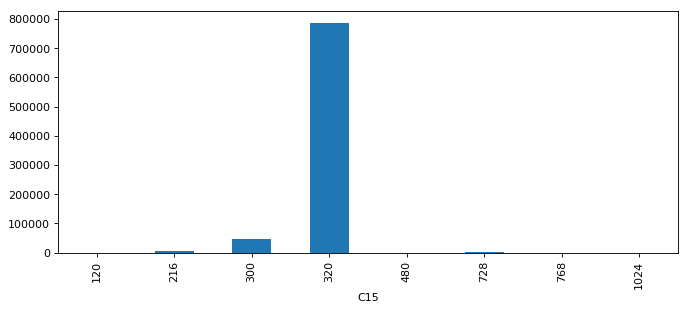

In [18]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['C15'])['click'].agg('count').plot.bar()
plt.show()

In [19]:
train_data[["click","C15"]].groupby("C15").mean().sort_values('click',ascending=False)

,click
C15,
300,0.376449
768,0.320000
1024,0.250000
480,0.219512
320,0.158500
216,0.128220
728,0.057357
120,0.010526


### Feature C16
The category 50 has the max number of observations. However, the category 250 has the highest click through rate of 0.43.

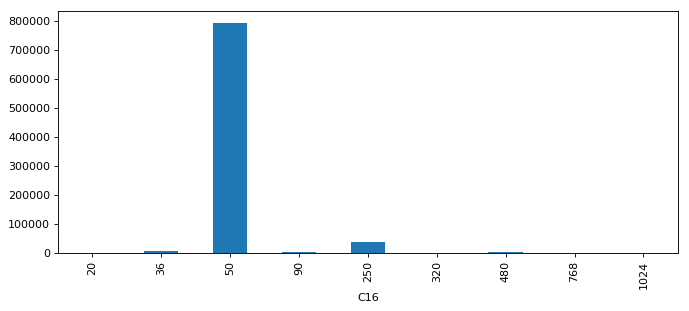

In [20]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['C16'])['click'].agg('count').plot.bar()
plt.show()

In [21]:
train_data[["click","C16"]].groupby("C16").mean().sort_values('click',ascending=False)

,click
C16,
250,0.431632
1024,0.320000
768,0.250000
320,0.219512
480,0.215951
50,0.158257
36,0.128220
90,0.057357
20,0.010526


### Feature C18
The category 0 has the max number of observations. However, the category 2 has the highest click through rate of 0.295. The category 0 has the second highest CTR of 0.15.

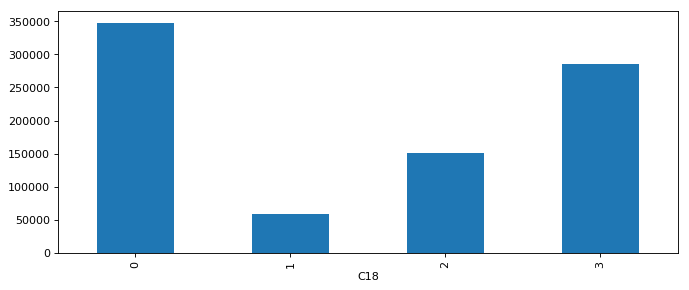

In [22]:
figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
train_data.groupby(['C18'])['click'].agg('count').plot.bar()
plt.show()

In [23]:
train_data[["click","C18"]].groupby("C18").mean().sort_values('click',ascending=False)

,click
C18,
2,0.295401
0,0.153568
3,0.152403
1,0.034212


### Feature Hour
Splitting the feature hour into date and time helps in analyzing the click through rate on different days and at different times.

In [24]:
train_data['date'] = pd.to_datetime(train_data['hour'], format='%y%m%d%H').dt.strftime("%Y-%m-%d")
train_data['time'] = pd.to_datetime(train_data['hour'], format='%y%m%d%H').dt.strftime("%H")

### Time
The below graph shows that the click through rate is the highest between 3 PM - 4 PM and the lowest between 8 AM - 9 AM. This shows that click through rate varies by time.

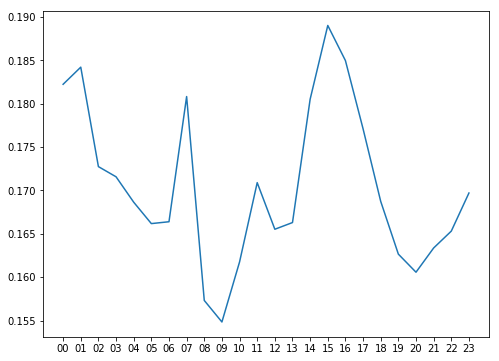

In [25]:
t = train_data[["click","time"]].groupby("time").mean()
plt.figure(figsize = (8,6))
plt.plot(t.index,t['click'])
plt.show()

### Date
The click through rate varies across different dates. The CTR is in the range 0.15 - 0.19. There is a peak at 2014-10-30. This is because the data for this date is only available for 00 hours. From the previous graph we can see that the CTR is usually high at 00 hours. The lower values of CTR during the day brings down the average CTR for that particular day. 

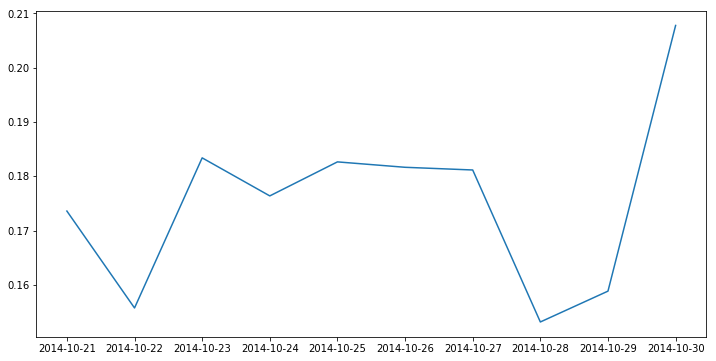

In [26]:
d = train_data[["click","date"]].groupby("date").mean()
plt.figure(figsize = (12,6))
plt.plot(d.index,d['click'])
plt.show()

## Data Preparation
-  The column 'id' is dropped from both the train and test dateset. The date and time features created above are also dropped form the training dataset. The int datatype feature 'hour' is used in the model.
-  The columns with 'object' datatype are converted to numeric datatype.

In [27]:
test = test_data #To retain the original test data set

In [28]:
train_data.drop(columns = ['id', 'date', 'time'], inplace = True)
test_data.drop(columns = ['id'], inplace = True)

In [29]:
for c in train_data.columns:
    if(train_data[c].dtype == 'object'):
        replace_map_comp = {}
        train_labels = train_data[c].astype('category').cat.categories.tolist() #get unique categories from train dataset
        test_labels = test_data[c].astype('category').cat.categories.tolist() #get unique categories from test dataset
        labels = list(set(train_labels + test_labels)) #master data for unique categories from train and test dataset
        replace_map_comp = {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))} #for each category, assign a numeric value
        train_data[c] = train_data[c].apply(lambda x: replace_map_comp.get(x,x)) #the object datatype is mapped to the numeric value from the previous step in train dataset
        test_data[c] = test_data[c].apply(lambda x: replace_map_comp.get(x,x)) #the object datatype is mapped to the numeric value from the previous step in test dataset

In [30]:
train_data.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102100,1005,0,89,916,13,557,42,6,...,1,2,20596,320,50,2161,0,35,100148,157
1,1,14102100,1005,0,2160,605,12,342,131,11,...,1,0,18993,320,50,2161,0,35,100034,157
2,0,14102100,1005,0,2160,605,12,1974,110,17,...,1,0,21611,320,50,2480,3,297,100111,61
3,0,14102100,1005,0,2160,605,12,355,120,17,...,1,0,4687,320,50,423,2,39,100148,32
4,0,14102100,1005,0,1953,598,2,557,42,6,...,1,2,15706,320,50,1722,0,35,100084,79


In [31]:
test_data.head()

,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,14103000,1002,0,2160,605,12,56,42,6,56789,...,0,0,23553,300,50,2699,0,163,-1,212
1,14103000,1005,1,1234,1458,13,557,42,6,31734,...,1,0,17614,320,50,1993,2,1063,-1,33
2,14103000,1005,0,2160,605,12,954,62,11,31734,...,1,0,23726,320,50,2717,2,47,-1,23
3,14103000,1005,0,1953,598,2,557,42,6,31734,...,1,0,15704,320,50,1722,0,35,100084,79
4,14103000,1005,0,570,428,18,557,42,6,31734,...,1,0,17239,320,50,1973,3,39,-1,23


In [32]:
train_data.info() #all features are of type int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843502 entries, 0 to 843501
Data columns (total 23 columns):
click               843502 non-null int64
hour                843502 non-null int64
C1                  843502 non-null int64
banner_pos          843502 non-null int64
site_id             843502 non-null int64
site_domain         843502 non-null int64
site_category       843502 non-null int64
app_id              843502 non-null int64
app_domain          843502 non-null int64
app_category        843502 non-null int64
device_id           843502 non-null int64
device_ip           843502 non-null int64
device_model        843502 non-null int64
device_type         843502 non-null int64
device_conn_type    843502 non-null int64
C14                 843502 non-null int64
C15                 843502 non-null int64
C16                 843502 non-null int64
C17                 843502 non-null int64
C18                 843502 non-null int64
C19                 843502 non-null int64
C20    

In [33]:
test_data.info() #all features are of type int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
hour                100000 non-null int64
C1                  100000 non-null int64
banner_pos          100000 non-null int64
site_id             100000 non-null int64
site_domain         100000 non-null int64
site_category       100000 non-null int64
app_id              100000 non-null int64
app_domain          100000 non-null int64
app_category        100000 non-null int64
device_id           100000 non-null int64
device_ip           100000 non-null int64
device_model        100000 non-null int64
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 100000 non-null int64
C19                 100000 non-null int64
C20                 100000 non-null int64
C21     

## Model Building
-  Split the training dataset into train and test sets using train_test_split. Random_state (seed) is set as 0 so that every time the code is run, the data is split in the same way.
-  Implemented multiple models like k-nearest neighbor, logistic regression, decision tree, random forest and gradient boosting. Compared the results of these different models to find out the model that best fits the dataset and generalizes well on test dataset.
-  Used grid search for hyperparameter tuning to determine the optimal values of the model hyperparameters. Also used cross validation to assess how well the model generalizes on unseen data.
-  The training dataset is unbalanced - approximately 87% of the data is clicked and only 13% not clicked. Analyzing only the accuracy metric to measure the performance of the model yields biased result. Therefore, used ROC AUC score as the performance measure for the models. Higher the AUC score, better is the model.

In [34]:
#Train dataset are split into X (independent features) and Y (target variable)
X = train_data.drop(['click'], axis=1)
Y = train_data['click']

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle = True, random_state = 0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (632626, 22)
Number transactions y_train dataset:  (632626,)
Number transactions X_test dataset:  (210876, 22)
Number transactions y_test dataset:  (210876,)


In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

## K-Nearest Neighbor
Hyperparameter - number of neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_classifier_param_grid = {'n_neighbors': [5, 10, 15, 20]}
knn_classifier_grid_search = GridSearchCV(knn, knn_classifier_param_grid, cv=5, return_train_score=True,n_jobs=20)
knn_classifier_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(knn_classifier_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(knn_classifier_grid_search.best_score_))
print("Test set score: {:.2f}".format(knn_classifier_grid_search.score(X_test, y_test)))

y_knn_predict = knn_classifier_grid_search.predict(X_test)
y_knn_train_predict = knn_classifier_grid_search.predict(X_train)

print('Train ROC AUC score: %.2f'%roc_auc_score(y_train, y_knn_train_predict))
print('Test ROC AUC score: %.2f '%roc_auc_score(y_test, y_knn_predict))

report_table1 = [['knn', knn_classifier_grid_search.best_params_, knn_classifier_grid_search.score(X_train, y_train), knn_classifier_grid_search.score(X_test, y_test), roc_auc_score(y_train, y_knn_train_predict), roc_auc_score(y_test, y_knn_predict) ]]

Best parameters: {'n_neighbors': 20}
Best cross-validation score: 0.83
Test set score: 0.83
Train ROC AUC score: 0.52
Test ROC AUC score: 0.51 


## Logistic Regression
Hyperparameters - penalty (norm function used to penalize), C (inverse of regularizaton strength)

In [38]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
logreg_grid_search = GridSearchCV(lreg, logreg_param_grid, cv=5, return_train_score=True,n_jobs=20)
logreg_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(logreg_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(logreg_grid_search.best_score_))
print("Test set score: {:.2f}".format(logreg_grid_search.score(X_test, y_test)))

y_logreg_predict = logreg_grid_search.predict(X_test)
y_logreg_train_predict = logreg_grid_search.predict(X_train)
print('Train ROC AUC score: %.2f'%roc_auc_score(y_train, y_logreg_train_predict))
print('Test ROC AUC score: %.2f '%roc_auc_score(y_test, y_logreg_predict))

report_table1 = report_table1 + [['Logistic Regression', logreg_grid_search.best_params_, logreg_grid_search.score(X_train, y_train), logreg_grid_search.score(X_test, y_test), roc_auc_score(y_train, y_logreg_train_predict), roc_auc_score(y_test, y_logreg_predict) ]]

Best parameters: {'C': 0.001, 'penalty': 'l2'}
Best cross-validation score: 0.83
Test set score: 0.83
Train ROC AUC score: 0.50
Test ROC AUC score: 0.50 


## Decision Tree
Hyperparameters - maximum depth of the tree, random_state (seed)
The hyperparameter 'Maximum depth of the tree' limits the number of nodes and helps in preventing overfitting

In [39]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
d = np.arange(20)+1
dtree_param_grid = {'max_depth': d, 'random_state': [0]}
dtree_grid_search = GridSearchCV(dtree, dtree_param_grid, cv=5, return_train_score=True,n_jobs=20)
dtree_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(dtree_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(dtree_grid_search.best_score_))
print("Test set score: {:.2f}".format(dtree_grid_search.score(X_test, y_test)))

y_dtree_predict = dtree_grid_search.predict(X_test)
y_dtree_train_predict = dtree_grid_search.predict(X_train)
print('Train ROC AUC score: %.2f'%roc_auc_score(y_train, y_dtree_train_predict))
print('Test ROC AUC score: %.2f '%roc_auc_score(y_test, y_dtree_predict))

report_table1 = report_table1 + [['Decision Tree', dtree_grid_search.best_params_, dtree_grid_search.score(X_train, y_train), dtree_grid_search.score(X_test, y_test), roc_auc_score(y_train, y_dtree_train_predict), roc_auc_score(y_test, y_dtree_predict) ]]

Best parameters: {'max_depth': 10, 'random_state': 0}
Best cross-validation score: 0.83
Test set score: 0.83
Train ROC AUC score: 0.54
Test ROC AUC score: 0.54 


## Random Forest
Hyperparameters - n_estimators (number of trees in the forest), maximum depth and random state (seed)

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf_param_grid = {'n_estimators': [5,10,30,50],
                'max_depth': [3,6,9,12,15],
                'random_state': [0]}

rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, return_train_score=True,n_jobs=20)
rf_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(rf_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(rf_grid_search.best_score_))
print("Test set score: {:.2f}".format(rf_grid_search.score(X_test, y_test)))

y_rf_predict = rf_grid_search.predict(X_test)
y_rf_train_predict = rf_grid_search.predict(X_train)
print('Train ROC AUC score: %.2f'%roc_auc_score(y_train, y_rf_train_predict))
print('Test ROC AUC score: %.2f '%roc_auc_score(y_test, y_rf_predict))

report_table1 = report_table1 + [['Random Forest', rf_grid_search.best_params_, rf_grid_search.score(X_train, y_train), rf_grid_search.score(X_test, y_test), roc_auc_score(y_train, y_rf_train_predict), roc_auc_score(y_test, y_rf_predict) ]]

Best parameters: {'max_depth': 15, 'n_estimators': 50, 'random_state': 0}
Best cross-validation score: 0.83
Test set score: 0.83
Train ROC AUC score: 0.54
Test ROC AUC score: 0.53 


## Gradient Boosting
Hyperparameters - n_estimators (number of boosting stages), maximum depth, learning rate and random state (seed)

In [41]:
from  sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier()
gbrt_param_grid = {'n_estimators': [5,10,20],
                   'max_depth': [3,6,9,12],
                   'learning_rate': [.5, 1],
                   'random_state': [0]}

gbrt_grid_search = GridSearchCV(gbrt, gbrt_param_grid, cv=5, return_train_score=True,n_jobs=20)
gbrt_grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(gbrt_grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(gbrt_grid_search.best_score_))
print("Test set score: {:.2f}".format(gbrt_grid_search.score(X_test, y_test)))

y_gbrt_predict = gbrt_grid_search.predict(X_test)
y_gbrt_train_predict = gbrt_grid_search.predict(X_train)
print('Train ROC AUC score: %.2f'%roc_auc_score(y_train, y_gbrt_train_predict))
print('Test ROC AUC score: %.2f '%roc_auc_score(y_test, y_gbrt_predict))

report_table1 = report_table1 + [['Gradient Boosting', gbrt_grid_search.best_params_, gbrt_grid_search.score(X_train, y_train), gbrt_grid_search.score(X_test, y_test), roc_auc_score(y_train, y_gbrt_train_predict), roc_auc_score(y_test, y_gbrt_predict) ]]

Best parameters: {'learning_rate': 0.5, 'max_depth': 6, 'n_estimators': 20, 'random_state': 0}
Best cross-validation score: 0.83
Test set score: 0.83
Train ROC AUC score: 0.53
Test ROC AUC score: 0.53 


## Summary of all the models

In [42]:
report1 = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'Train ROC AUC score', 'Test ROC AUC score'])
report1

,Model name,Model parameter,Train accuracy,Test accuracy,Train ROC AUC score,Test ROC AUC score
0,knn,{'n_neighbors': 20},0.833149,0.828349,0.522738,0.514107
1,Logistic Regression,"{'C': 0.001, 'penalty': 'l2'}",0.829855,0.829350,0.500000,0.500000
2,Decision Tree,"{'max_depth': 10, 'random_state': 0}",0.835244,0.832575,0.539148,0.535238
3,Random Forest,"{'max_depth': 15, 'n_estimators': 50, 'random_...",0.839937,0.834230,0.544542,0.534183
4,Gradient Boosting,"{'learning_rate': 0.5, 'max_depth': 6, 'n_esti...",0.834967,0.833352,0.532910,0.531127


## Best Model
Tree based models perform quite well in this case. Used Random Forest model with the best hyperparameters to understand the feature importance and making predictions:

In [43]:
rf = RandomForestClassifier(n_estimators=30, max_depth=9, random_state=0, oob_score=True)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

### Feature Importance
The most important feature is C16. Site related features are more important. Next are the app related features and finally device related features.

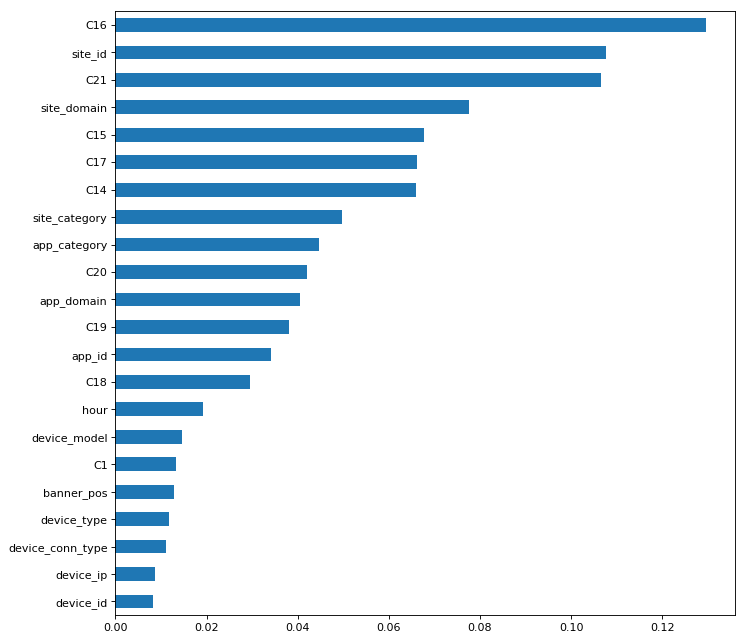

In [44]:
import pandas
pandas.set_option('display.max_columns', 10)
pandas.set_option('display.width', 2)

figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pandas.Series(rf.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

## Predictions
Used the Random Forest model to make predictions on the test dataset. Also found out the probability of prediction. Merged the results with the original test dataset and exported it to csv file.

In [46]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
hour                100000 non-null int64
C1                  100000 non-null int64
banner_pos          100000 non-null int64
site_id             100000 non-null int64
site_domain         100000 non-null int64
site_category       100000 non-null int64
app_id              100000 non-null int64
app_domain          100000 non-null int64
app_category        100000 non-null int64
device_id           100000 non-null int64
device_ip           100000 non-null int64
device_model        100000 non-null int64
device_type         100000 non-null int64
device_conn_type    100000 non-null int64
C14                 100000 non-null int64
C15                 100000 non-null int64
C16                 100000 non-null int64
C17                 100000 non-null int64
C18                 100000 non-null int64
C19                 100000 non-null int64
C20                 100000 non-null int64
C21     

In [48]:
predictions = rf.predict(test_data)
probability = rf.predict_proba(test_data)

y_test = pd.DataFrame({'Probability_Click_0':probability[:,0],'Probability_Click_1':probability[:,1]})
y_test['click'] = predictions

In [49]:
result = pd.merge(test, y_test, how = 'left', left_index = True, right_index = True)

In [50]:
result.to_csv('Predictions.csv', sep=',', encoding='utf-8')